# 信號與系統實習


## 實驗開始步驟：

### (1)前往 https://github.com/htygithub/SS_EXP 點選右下角按鈕 "Download Zip"
### (2)開啟 Lesson_3_FIR_fiter_and_frequency_response

## 實驗十二
### FIR濾波器的應用
### 執行以下程式碼並觀察輸出

ECG samples: (2500,)
Sampling frequency: 250


Text(0.5, 0, 'Time [s]')

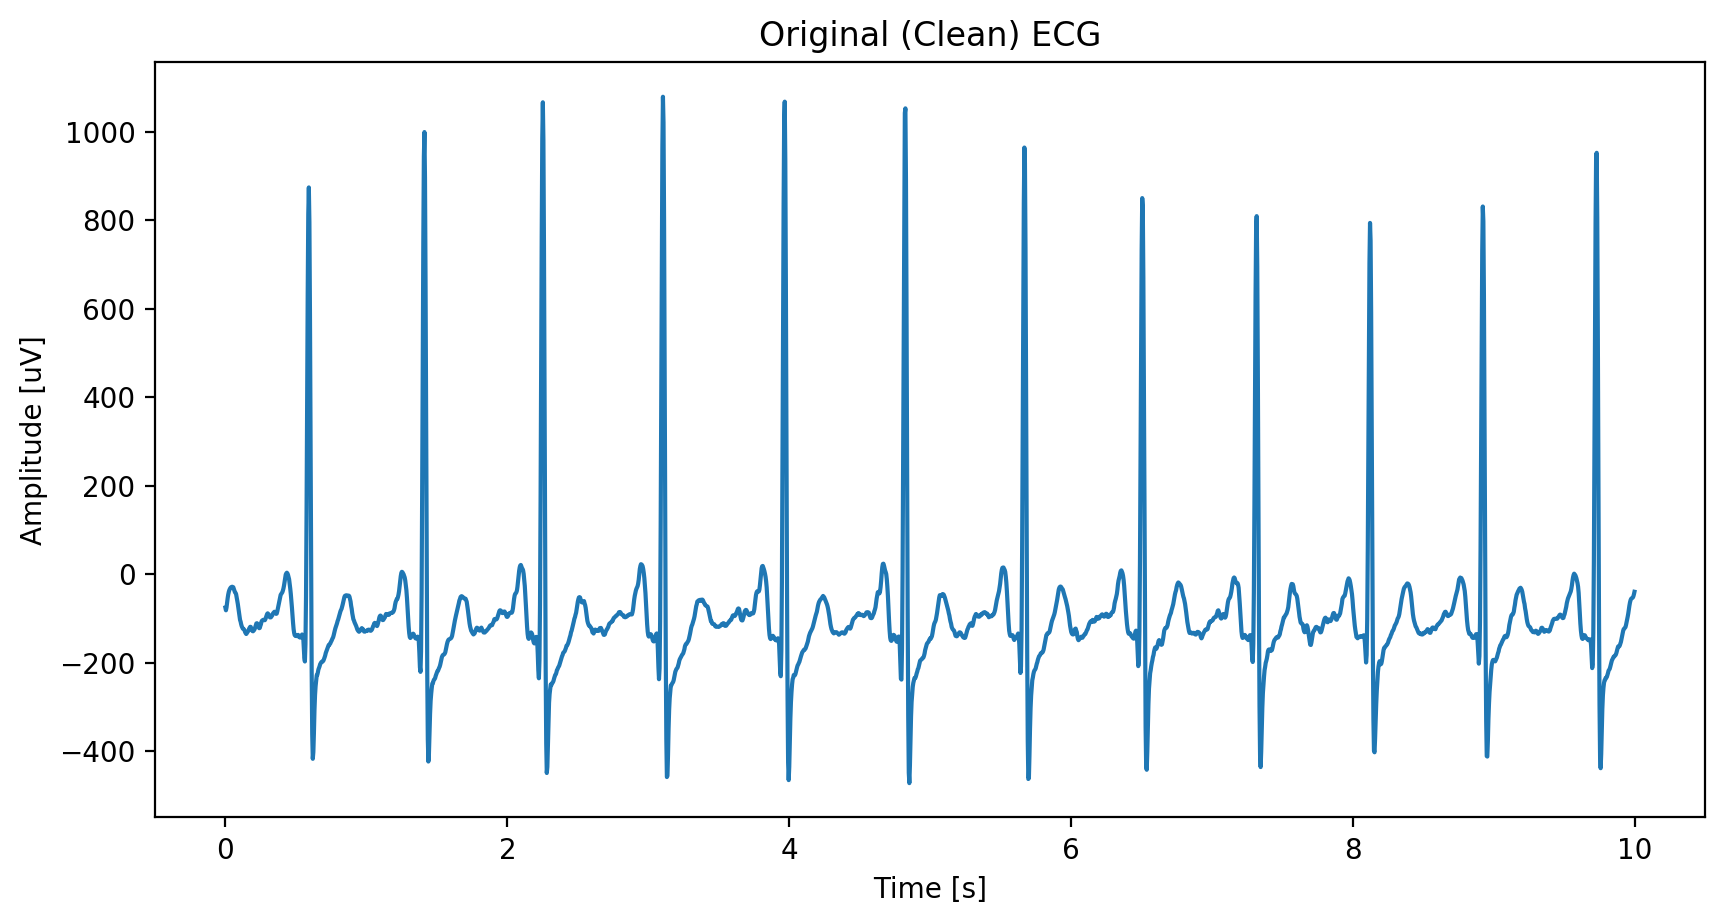

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]
print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)
t = np.arange(0, ecg.size/fs, 1/fs)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(t, ecg)
plt.title('Original (Clean) ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

## 問題十二
### 上圖為長度10秒之心電圖波形，用取樣頻率fs=250Hz 取樣，信號單位為uV
### <BR>(1) 參考實驗十一為將信號取快速傅利葉轉換, 繪製出信號頻譜，橫軸以類比頻率(Hz)來表示。

### <BR>(2) 產生一電力線偶合雜訊cos 波，Amplitude: 250uV, Phase: 0 rad, Frequency: 60 Hz，並繪製出受雜訊干擾之心電圖波形ecg_n

### <BR>(3) 繪製出受雜訊干擾的心電圖頻譜，橫軸以類比頻率(Hz)來表示。
    

## (1)

ECG samples: (2500,)
Sampling frequency: 250


Text(0.5, 0, 'analog frequency (Hz)')

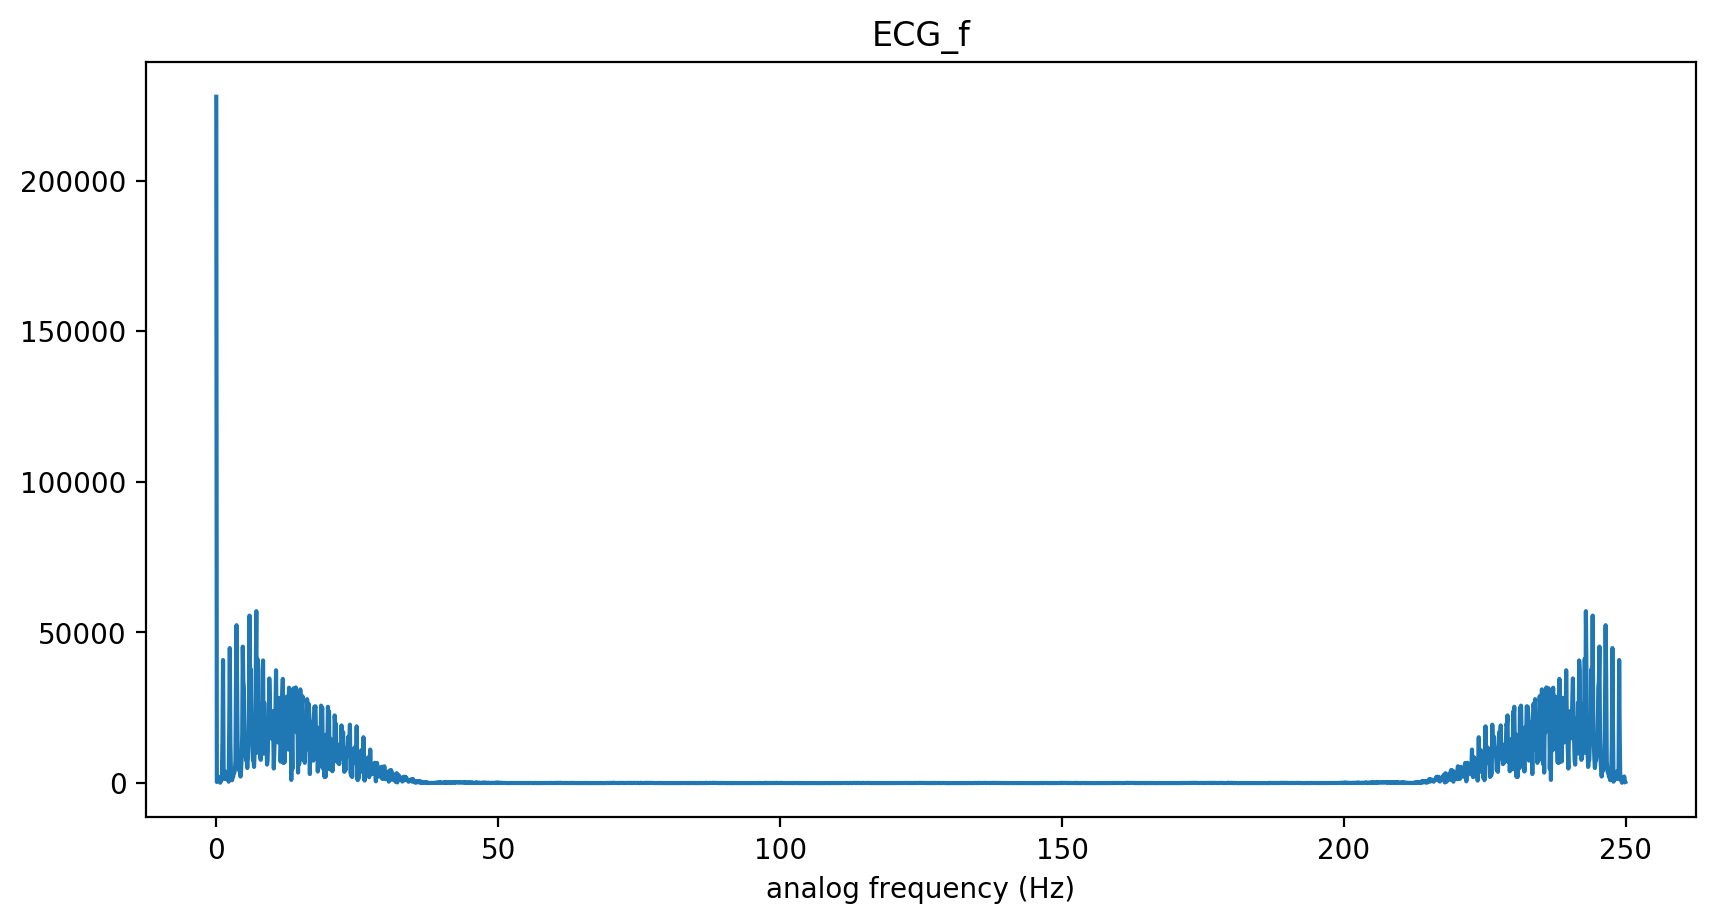

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]
print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)

t = np.arange(0, ecg.size/fs, 1/fs)
ecg_f = np.fft.fft(ecg)
w_hat = np.arange(0, 2*np.pi, 2*np.pi/(10*fs))
f_analog = w_hat/(2*np.pi) * fs

plt.figure(figsize=(10,5), dpi=200)
plt.plot(f_analog, abs(ecg_f))

plt.title('ECG_f');
plt.xlabel('analog frequency (Hz)')

## (2)

ECG samples: (2500,)
Sampling frequency: 250


Text(0.5, 0, 'Time [s]')

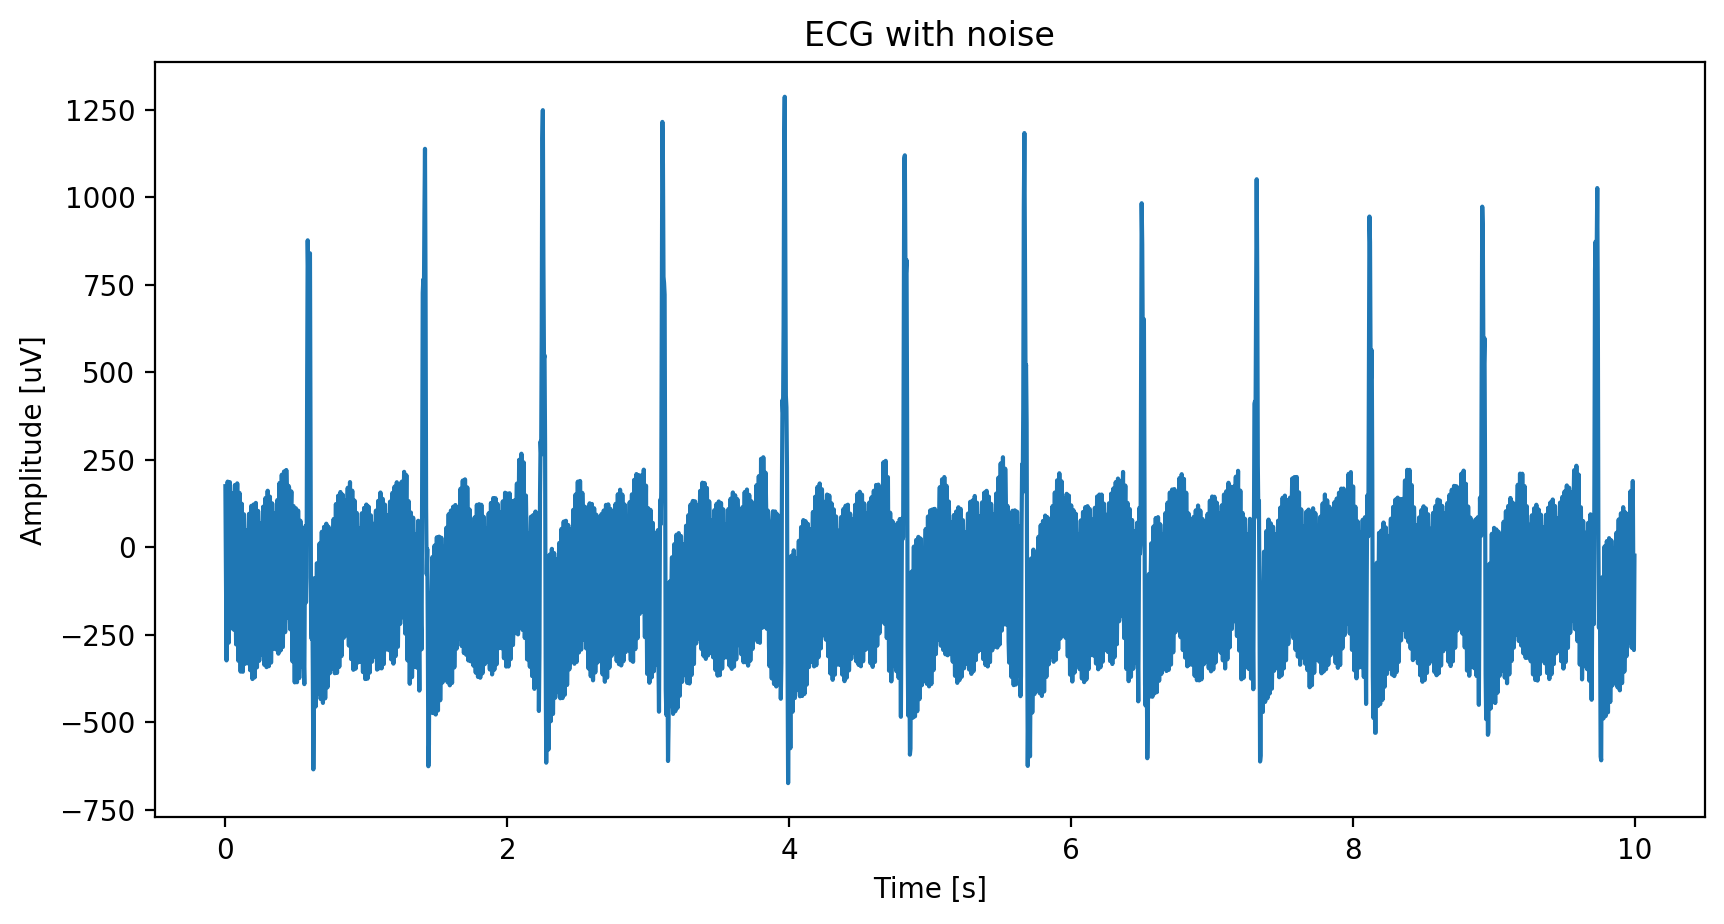

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]
print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)

t = np.arange(0, ecg.size/fs, 1/fs)
noise = 250*np.cos(2*np.pi*60*t)

ecg_noise = ecg + noise
ecg_noise_f = np.fft.fft(ecg_noise)

w_hat = np.arange(0, 2*np.pi, 2*np.pi/(10*fs))
f_analog = w_hat/(2*np.pi) * fs

plt.figure(figsize=(10,5), dpi=200)
plt.plot(t, ecg_noise)

plt.title('ECG with noise');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

## (3)

ECG samples: (2500,)
Sampling frequency: 250


Text(0.5, 0, 'analog frequency (Hz)')

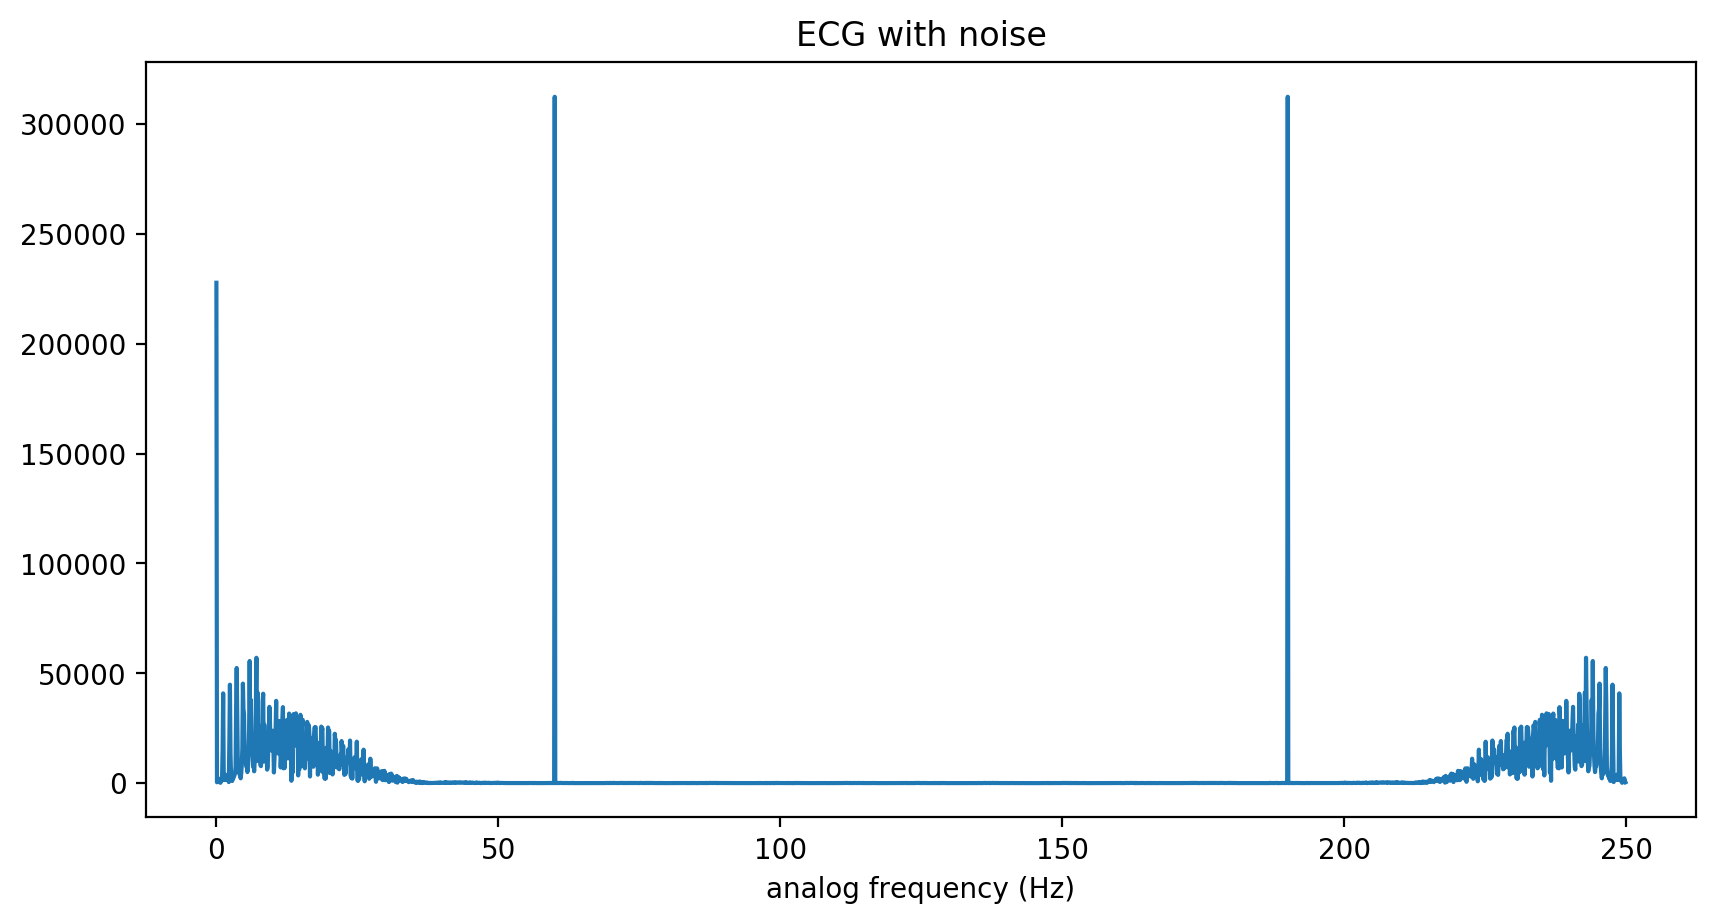

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]
print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)

t = np.arange(0, ecg.size/fs, 1/fs)
noise = 250*np.cos(2*np.pi*60*t)

ecg_noise = ecg + noise
ecg_noise_f = np.fft.fft(ecg_noise)

w_hat = np.arange(0, 2*np.pi, 2*np.pi/(10*fs))
f_analog = w_hat/(2*np.pi) * fs

plt.figure(figsize=(10,5), dpi=200)
plt.plot(f_analog, abs(ecg_noise_f))

plt.title('ECG with noise');
plt.xlabel('analog frequency (Hz)')

## 實驗十三
### 傅利葉以及反傅利葉
### 下圖之程式碼主要目的是將ecg轉換至頻率空間之後，將直流成份濾除後，再轉回時域
### 執行以下程式碼並觀察輸出

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Time [s]')

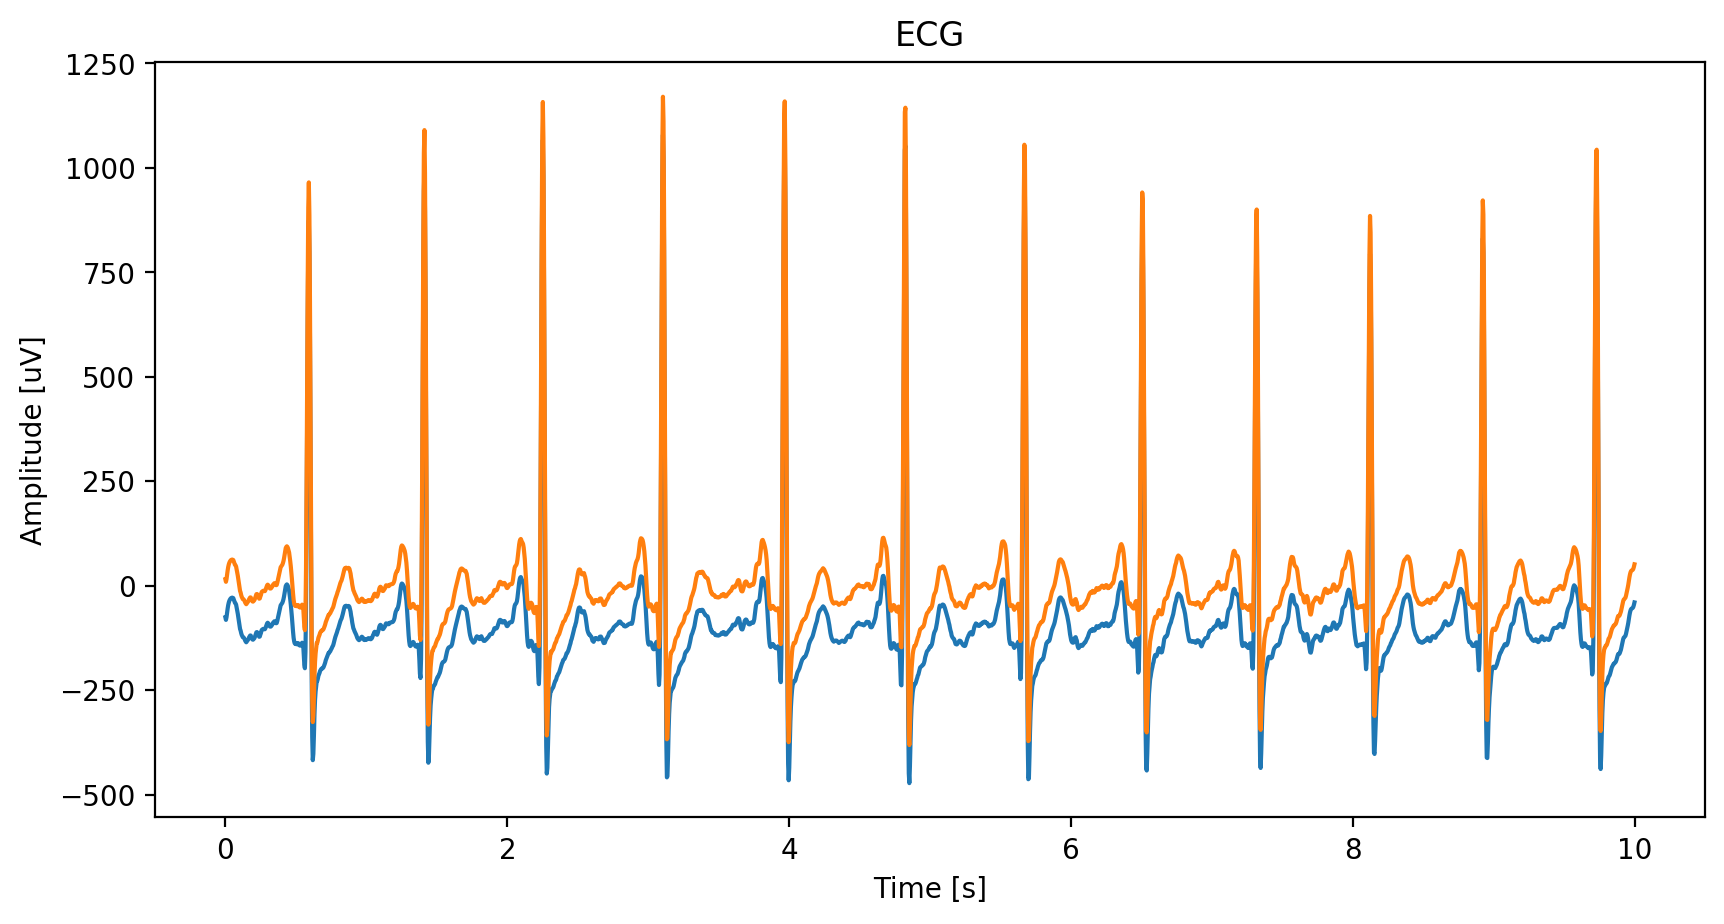

In [2]:
xf = np.fft.fft(ecg)
xf[0] = 0
ecg2 = np.fft.ifft(xf)
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, ecg)
plt.plot(t, ecg2)
plt.title('ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

## 問題十三

### <BR>(1) 參考實驗十三範例，先將受雜訊干擾之ecg_n，轉換至頻域後，將60Hz成份過濾掉再轉回時域，得到ecg_filtered。繪出ecg_filtered之時域及頻域信號

### <BR>(2) 參考實驗十一，設計一個三點平均濾波器 FIR filter, bk = [1/3, 1/3, 1/3] 並將ecg_n送入觀察結果

    

## (1)

Text(0.5, 0, 'analog frequency (Hz)')

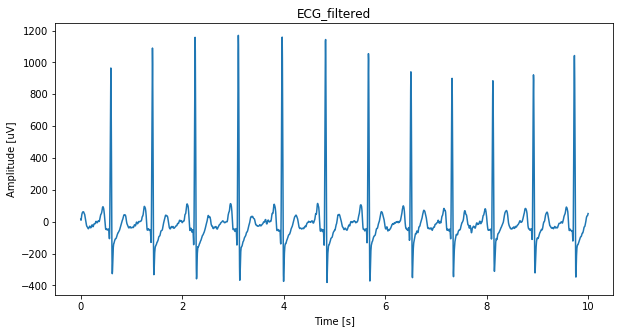

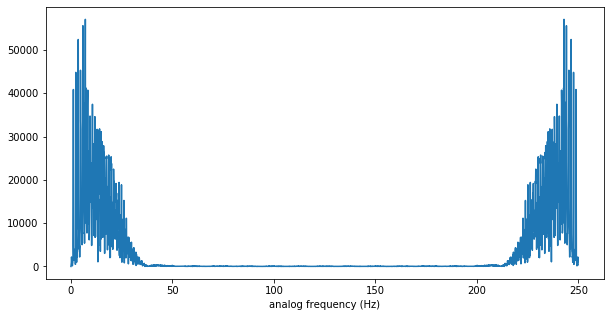

In [48]:
t = np.arange(0, ecg.size/fs, 1/fs)
noise = 250*np.cos(2*np.pi*60*t)

ecg_noise = ecg + noise
ecg_noise_f = np.fft.fft(ecg_noise)
ecg_noise_f[0] = 0
ecg_noise_f[600] = 0
ecg_noise_f[1900] = 0
ecg_filtered = np.fft.ifft(ecg_noise_f)

w_hat = np.arange(0, 2*np.pi, 2*np.pi/(10*fs))
f_analog = w_hat/(2*np.pi) * fs

plt.figure(figsize=(10, 5))
plt.plot(t, ecg_filtered)
plt.title('ECG_filtered');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

plt.figure(figsize=(10, 5))
plt.plot(f_analog, abs(ecg_noise_f))
plt.xlabel('analog frequency (Hz)')


## (2)

Text(0.5, 0, 'Time [s]')

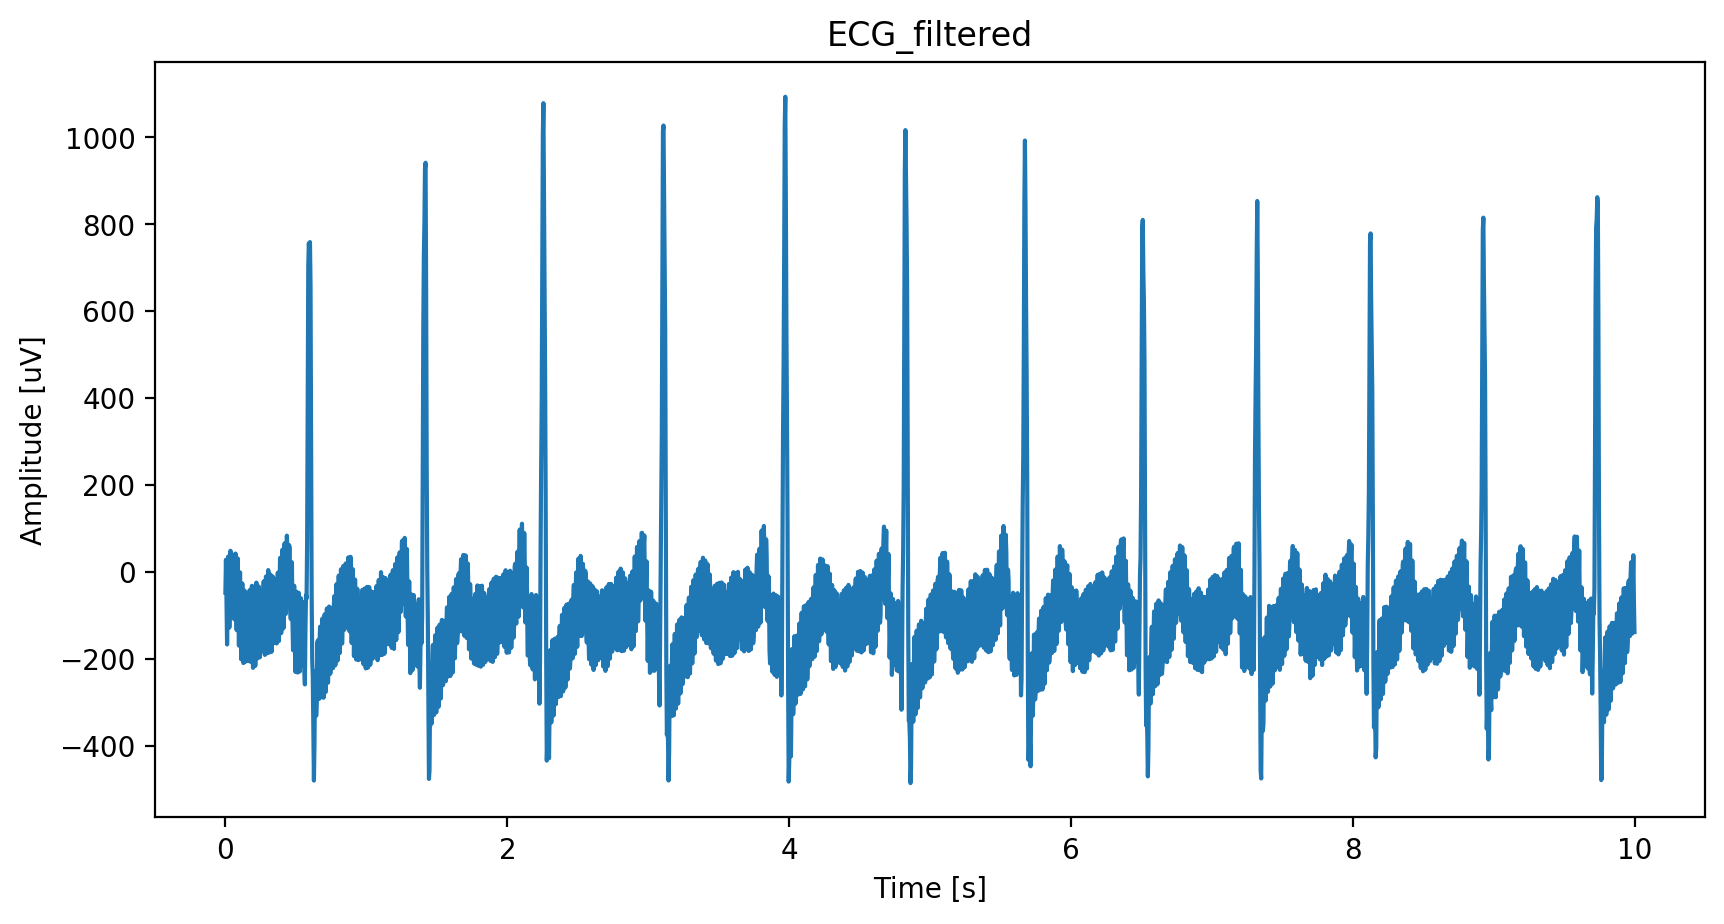

In [39]:
t = np.arange(0, ecg.size/fs, 1/fs)
noise = 250*np.cos(2*np.pi*60*t)

ecg_noise = ecg + noise

y = ecg_noise * 0
for i in range(len(y)):
    y[i] = (1/3) * (ecg_noise[i] + ecg_noise[i-1] + ecg_noise[i-2])

plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t,y)
plt.title('ECG_filtered');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

## 實驗十四
### 頻率響應
### 下面程式用來觀察頻率為20Hz的信號，經過fs=250Hz 取樣，並送入3點平均濾波器後，振輻的改變。


[1.         0.87630668 0.53582679 ... 0.06279052 0.53582679 0.87630668]
Amplitude of x: 1.0
Amplitude of y: 0.9175377866959373


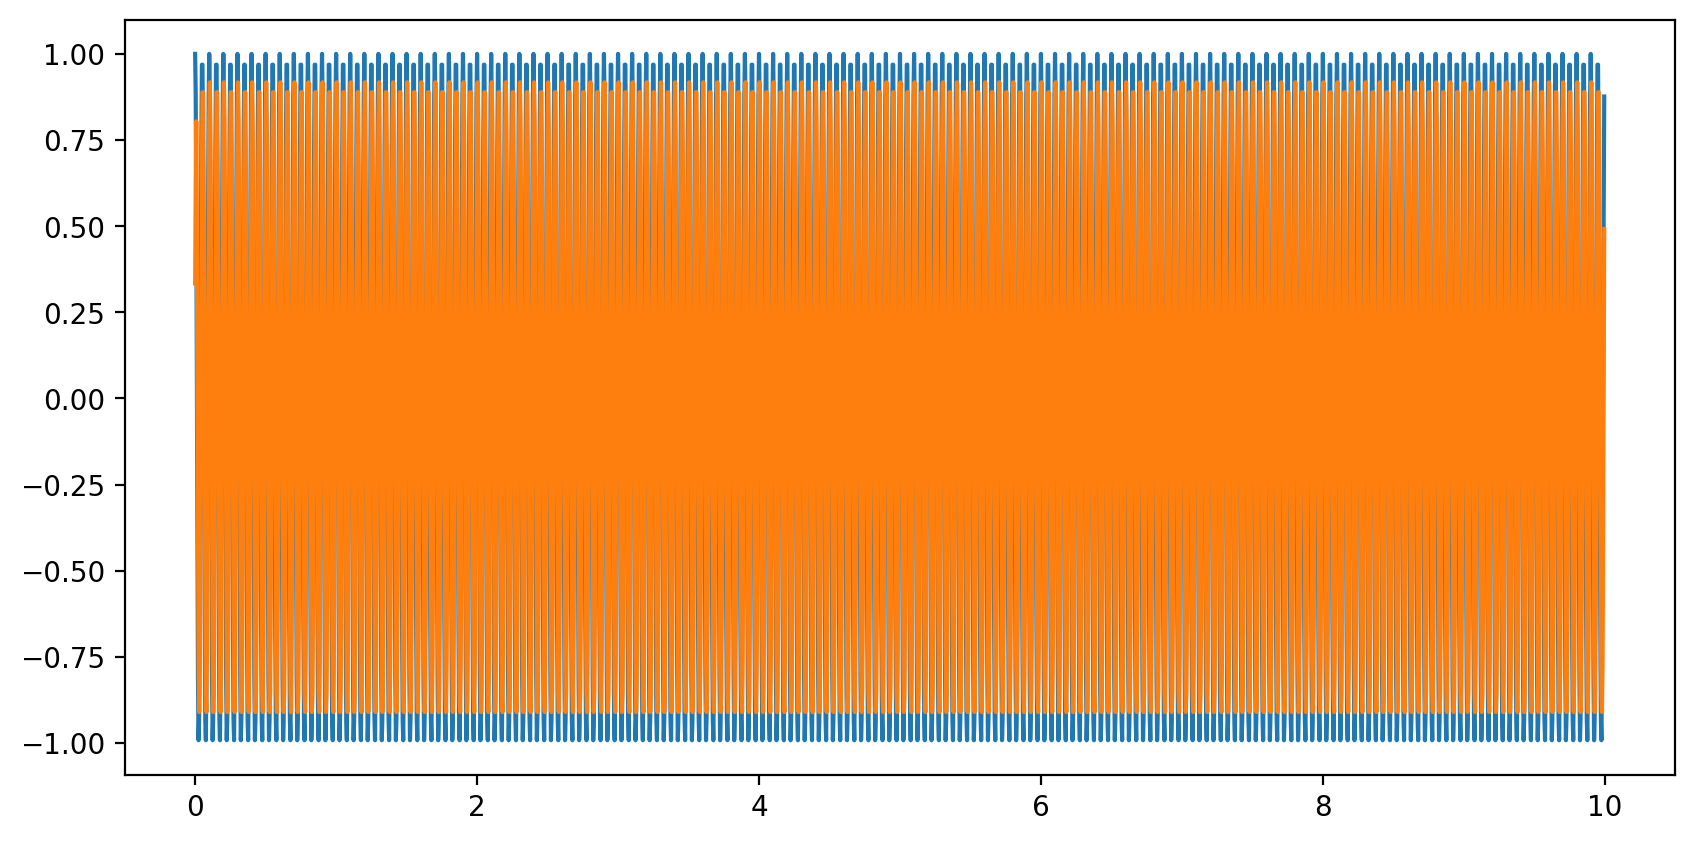

In [76]:
from scipy import signal
t = np.arange(0, ecg.size/fs, 1/fs)
x = np.cos(2*np.pi*20*t)
y = signal.lfilter([1/3, 1/3, 1/3], 1, x)

print('Amplitude of x:', np.max(x))
print('Amplitude of y:',np.max(y))
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, x)
plt.plot(t, y)

## 問題十四

### <BR>(1) 使用max來觀察弦波的振輻永遠正確嗎？
    
### <BR>(2) 改變輸入信號x之頻率由 0, 1, 2 ... 125Hz，觀察三點平均濾波器之輸出，並繪製出此FIR濾波器之等效頻率響應圖，橫軸為類比頻率(Hz)，縱軸為FIR filter之放大倍率。

### <BR>(3) 將FIR 改為 bk = [1/4, -2/4, 1/4] 並觀察其頻率響應。請問此FIR濾波器為高通或是低通濾波器。
    

## (1) 
<br> 如果訊號的準位不在0上，則max觀察到的振輻不正確。

## (2)

Text(0.5, 0, 'analog frequency [Hz]')

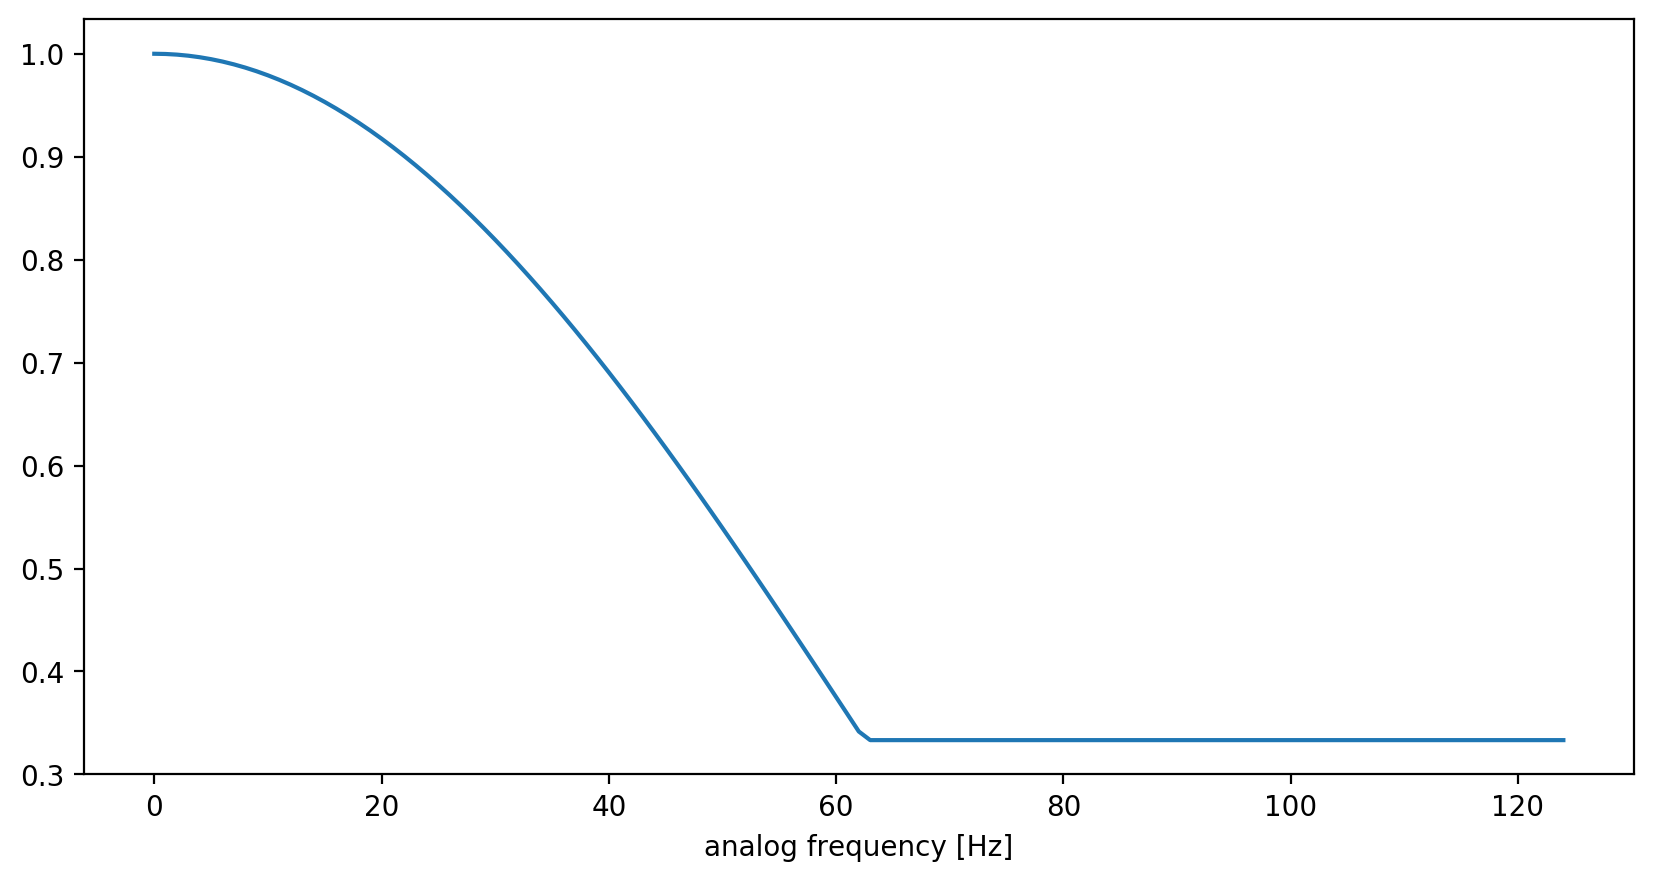

In [94]:
from scipy import signal
f = np.arange(0,125,1)

times = np.zeros(125, dtype=float)
for i in range(len(f)):
    t = np.arange(0, ecg.size/fs, 1/fs)
    x = np.cos(2*np.pi*i*t)
    y = signal.lfilter([1/3, 1/3, 1/3], 1, x)
    times[i] = np.max(y) / np.max(x)


plt.figure(figsize=(10, 5), dpi=200) 
plt.plot(f,times)
plt.xlabel('analog frequency [Hz]')

## (3)

Text(0.5, 0, 'analog frequency [Hz]')

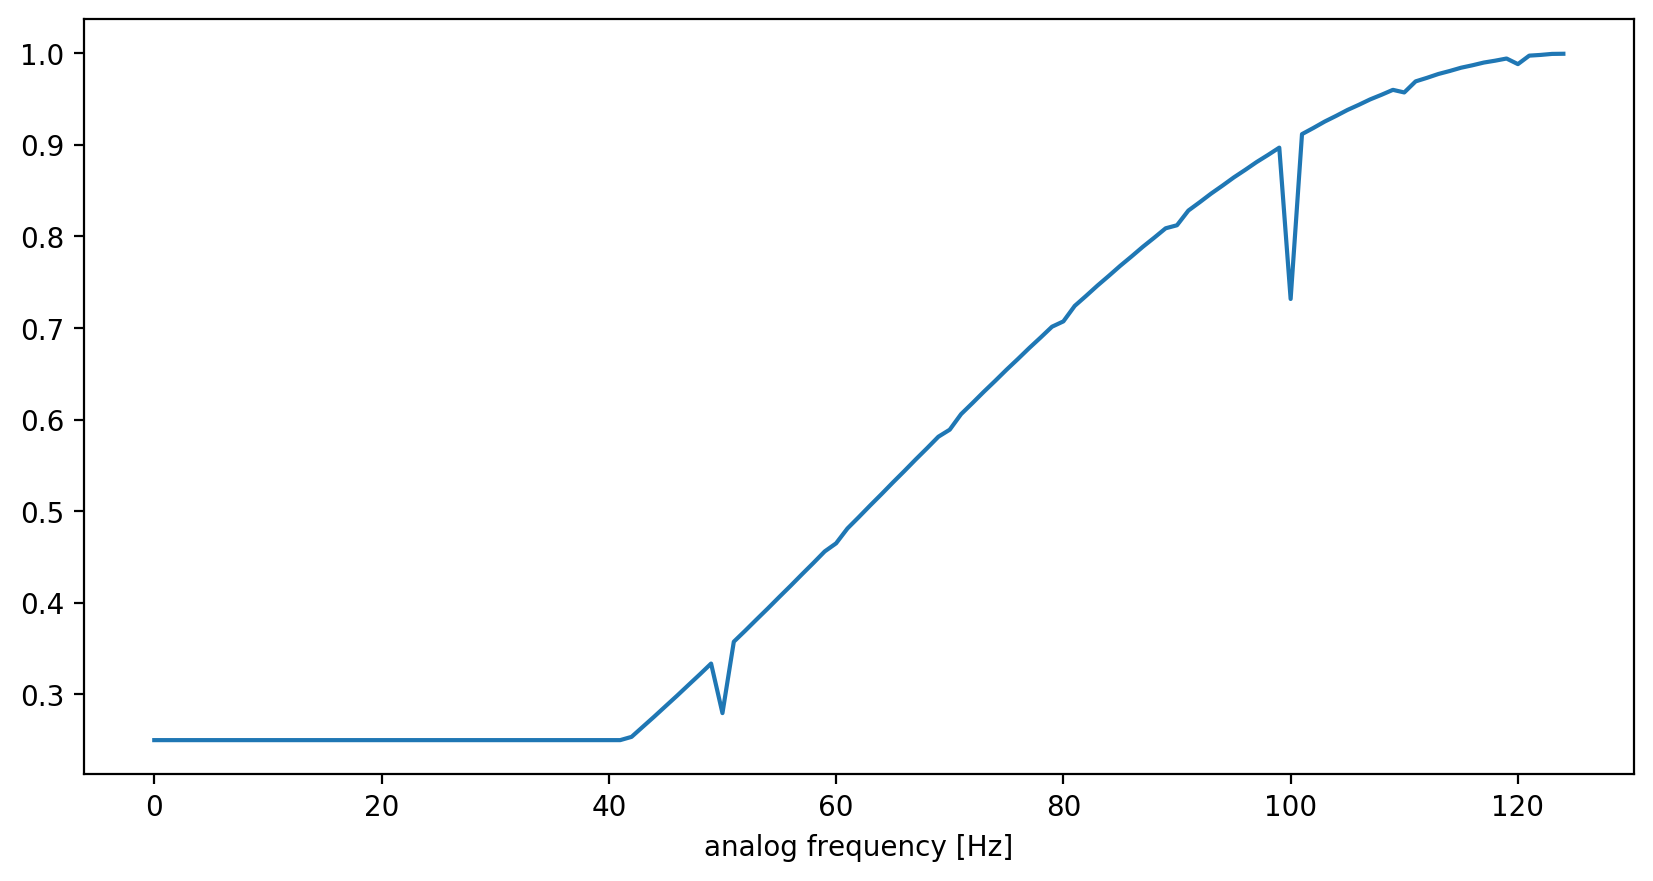

In [95]:
from scipy import signal
f = np.arange(0,125,1)

times = np.zeros(125, dtype=float)
for i in range(len(f)):
    t = np.arange(0, ecg.size/fs, 1/fs)
    x = np.cos(2*np.pi*i*t)
    y = signal.lfilter([1/4, (-2/4), 1/4], 1, x)
    times[i] = np.max(y) / np.max(x)
   
plt.figure(figsize=(10, 5), dpi=200) 
plt.plot(f,times)
plt.xlabel('analog frequency [Hz]')